In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Figure 2a

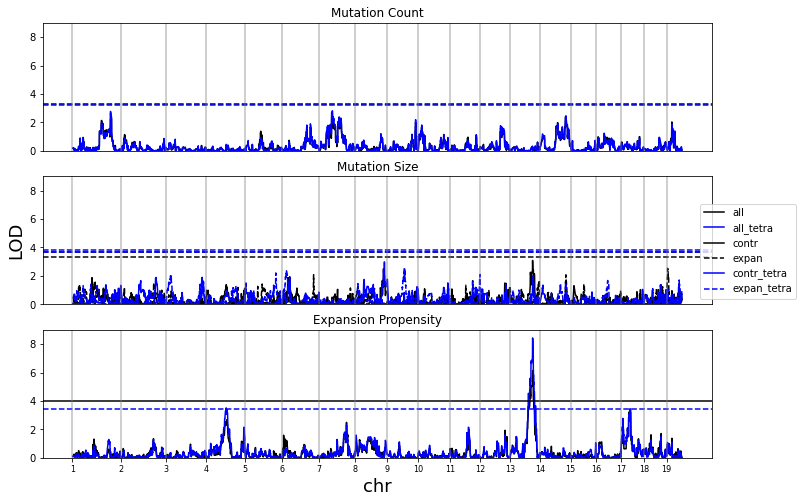

In [5]:
#### Load data #####
qtl_res = pd.read_csv('../outs/final_qtl_res.csv', index_col=0)
qtl_res_tetra = pd.read_csv('../outs/final_qtl_res_tetra.csv', index_col=0)

denovo_data = qtl_res[qtl_res['metric']=='% denovo']
expanded_data = qtl_res[qtl_res['metric']=='% expanded']
deltacontr_data = qtl_res[qtl_res['metric']=='delta (RU) contr']
deltaexpan_data = qtl_res[qtl_res['metric']=='delta (RU) expan']

denovo_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='% denovo']
expanded_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='% expanded']
deltacontr_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='delta (RU) contr']
deltaexpan_data_tetra = qtl_res_tetra[qtl_res_tetra['metric']=='delta (RU) expan']

# find max length of chr based on furthest snp (approx)
chr_len = {}
for index, row in denovo_data.iterrows():
    chrom = row['chr']
    cur_len = row['end']
    if chrom in chr_len:
        chr_len[chrom] = max(chr_len[chrom], cur_len)
    else:
        chr_len[chrom] = cur_len
        
# have 100 bp buffer between chr
for key in chr_len:
    chr_len[key] += 100

#chr starting position if all chr positions are merged (flattened)
chr_start = {}
index = 0
for key in chr_len:
    chr_start[key] = index
    index += chr_len[key]
    
labels_pos = []
labels_chr = []   
for key, value in chr_start.items():
    labels_pos.append(value+5000)
    labels_chr.append(key.split('chr')[1])
    
flattened_pos = []
for index, row in denovo_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
denovo_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in expanded_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
expanded_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltacontr_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltacontr_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltaexpan_data.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltaexpan_data.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in denovo_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
denovo_data_tetra.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in expanded_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
expanded_data_tetra.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltacontr_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltacontr_data_tetra.insert(6, 'flattened_pos', flattened_pos)

flattened_pos = []
for index, row in deltaexpan_data_tetra.iterrows():
    chrom = row['chr']
    flattened_pos.append(chr_start[chrom] + row['pos'])
deltaexpan_data_tetra.insert(6, 'flattened_pos', flattened_pos)

fig, ax = plt.subplots(3, figsize=(12, 8))
ax[0].set_ylim([0, 9])
ax[0].plot(denovo_data['flattened_pos'], denovo_data['LOD'], color = 'black', label='all')
ax[0].plot(denovo_data_tetra['flattened_pos'], denovo_data_tetra['LOD'], color = 'blue', label='all_tetra')
ax[0].axhline(y = list(denovo_data['lod_thresh'])[0], color = 'black', linestyle='--')
ax[0].axhline(y = list(denovo_data_tetra['lod_thresh'])[0], color = 'blue', linestyle='--')

ax[0].tick_params(axis='both', bottom=False, labelbottom=False)
ax[0].axes.xaxis.set_ticklabels([])
ax[0].title.set_text('Mutation Count')

ax[1].set_ylim([0, 9])
ax[1].plot(deltacontr_data['flattened_pos'], deltacontr_data['LOD'], color='black', label='contr')
ax[1].plot(deltaexpan_data['flattened_pos'], deltaexpan_data['LOD'], color='black', label='expan', linestyle='--')

ax[1].plot(deltacontr_data_tetra['flattened_pos'], deltacontr_data_tetra['LOD'], color='blue', label='contr_tetra')
ax[1].plot(deltaexpan_data_tetra['flattened_pos'], deltaexpan_data_tetra['LOD'], color='b', label='expan_tetra', linestyle='--')

ax[1].axhline(y = list(deltacontr_data['lod_thresh'])[0], color = 'black', linestyle='--')
ax[1].axhline(y = list(deltaexpan_data['lod_thresh'])[0], color = 'black', linestyle='--')
ax[1].axhline(y = list(deltacontr_data_tetra['lod_thresh'])[0], color = 'blue', linestyle='--')
ax[1].axhline(y = list(deltaexpan_data_tetra['lod_thresh'])[0], color = 'b', linestyle='--')

ax[1].tick_params(axis='both', bottom=False, labelbottom=False)
ax[1].axes.xaxis.set_ticklabels([])
ax[1].title.set_text('Mutation Size')

ax[2].set_ylim([0, 9])
ax[2].plot(expanded_data['flattened_pos'], expanded_data['LOD'], color='black', label='all')
ax[2].plot(expanded_data_tetra['flattened_pos'], expanded_data_tetra['LOD'], color='blue', label='tetra')
ax[2].axhline(y = list(expanded_data['lod_thresh'])[0], color = 'black')
ax[2].axhline(y = list(expanded_data_tetra['lod_thresh'])[0], color = 'blue', linestyle='--')

for pos in labels_pos:
    ax[0].axvline(x = pos, ymin = 0, ymax = 8, color = 'gray', alpha=0.5)
    ax[1].axvline(x = pos, ymin = 0, ymax = 8, color = 'gray', alpha=0.5)
    ax[2].axvline(x = pos, ymin = 0, ymax = 8, color = 'gray', alpha=0.5)


ax[2].title.set_text('Expansion Propensity')

# plt.yticks(fontsize=16)
plt.xticks(fontsize=8)
ax[2].set_xticks(labels_pos)
ax[2].set_xticklabels(labels_chr)

plt.xlabel('chr', fontsize=18)
ax[1].set_ylabel('LOD', fontsize=18)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
# plt.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0.)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='right')
plt.savefig('../pdfs/Fig2a.pdf')  

# Figure 2d

/var/folders/c1/k0129xhx4_bgpnnqt36vbnym0000gn/T/ipykernel_13846/2270980091.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtf_file_chr13[8] = gtf_file_chr13[8].apply(lambda x: x.split('gene_name "')[1].split('"')[0])


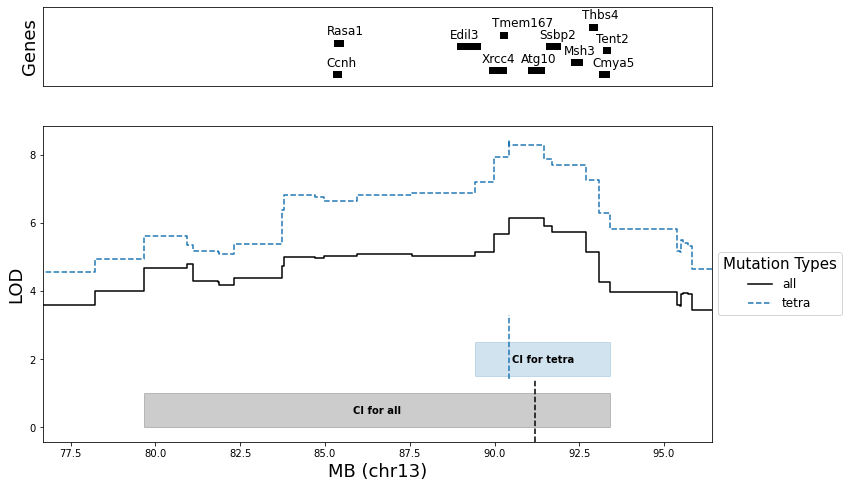

In [8]:
perc_expand_by_epoch = pd.read_csv('../outs/perc_expand_by_epoch_final.csv', index_col=0)
perc_expand_by_epoch_tetra = pd.read_csv('../outs/perc_expand_by_epoch_tetra_final.csv', index_col=0)

# set confidence intervals
# ci_lo = 83.78112; ci_hi = 93.41913; ci_mid = 90.4
# ci_lo = 79.67; ci_hi = 93.42; ci_mid = 91.21
# ci_lo_tetra = 87.58; ci_hi_tetra = 93.42; ci_mid_tetra = 90.44
qtl_ci = pd.read_csv('../outs/qtl_ci.csv', index_col=0)
qtl_ci_tetra = pd.read_csv('../outs/qtl_ci_tetra.csv', index_col=0)
ci_lo = float(qtl_ci['ci_lo']); ci_hi = float(qtl_ci['ci_hi']); ci_mid = float(qtl_ci['pos'])
ci_lo_tetra = float(qtl_ci_tetra['ci_lo']); ci_hi_tetra = float(qtl_ci_tetra['ci_hi']); ci_mid_tetra = float(qtl_ci_tetra['pos'])

# filter and change bp to mb
perc_expand_by_epoch_chr13 = perc_expand_by_epoch[perc_expand_by_epoch['chr']=='chr13']
perc_expand_by_epoch_chr13_pos_MB = perc_expand_by_epoch_chr13['pos']/1000000
perc_expand_by_epoch_chr13.insert(6, 'pos_MB', perc_expand_by_epoch_chr13_pos_MB)

perc_expand_by_epoch_chr13_tetra = perc_expand_by_epoch_tetra[perc_expand_by_epoch_tetra['chr']=='chr13']
perc_expand_by_epoch_chr13_tetra_pos_MB = perc_expand_by_epoch_chr13_tetra['pos']/1000000
perc_expand_by_epoch_chr13_tetra.insert(6, 'pos_MB', perc_expand_by_epoch_chr13_tetra_pos_MB)

# get points to plot to have the boxed square effect; get 3 points to plot from 2 data points
def get_pts(x_data, y_data):
    x_pts = []
    y_pts = []
    for i in range(len(x_data)-1):
        x_pts.append(x_data[i])
        y_pts.append(y_data[i])
        x_pts.append(x_data[i])
        y_pts.append(y_data[i+1])
    x_pts.append(x_data[-1])
    y_pts.append(y_data[-1])
    return x_pts, y_pts

# get traces for all and tetra
x_epoch1_pts, y_epoch1_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='1']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='1']['LOD']))
x_epoch2_pts, y_epoch2_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='2']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='2']['LOD']))
x_epoch3a_pts, y_epoch3a_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3a']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3a']['LOD']))
x_epoch3b_pts, y_epoch3b_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3b']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3b']['LOD']))
x_epoch4_7_pts, y_epoch4_7_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='4-7']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='4-7']['LOD']))
x_epoch_all_pts, y_epoch_all_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='all']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='all']['LOD']))

x_tetra_epoch1_pts, y_tetra_epoch1_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='1']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='1']['LOD']))
x_tetra_epoch2_pts, y_tetra_epoch2_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='2']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='2']['LOD']))
x_tetra_epoch3a_pts, y_tetra_epoch3a_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3a']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3a']['LOD']))
x_tetra_epoch3b_pts, y_tetra_epoch3b_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3b']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3b']['LOD']))
x_tetra_epoch4_7_pts, y_tetra_epoch4_7_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='4-7']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='4-7']['LOD']))
x_tetra_epoch_all_pts, y_tetra_epoch_all_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='all']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='all']['LOD']))

# genes: Ccnh, Rasa1, Edil3, Xrcc4, Tmem167, Atg10, Ssbp2, Msh3, Cmya5, Thbs4, Tent2
gtf_file = pd.read_csv('../data/vep/gencode.vM30.annotation.gtf.gz', skiprows=5, sep='\t', header=None)
gtf_file_chr13 = gtf_file[(gtf_file[0]=='chr13') & (gtf_file[2]=='gene')]
gtf_file_chr13[8] = gtf_file_chr13[8].apply(lambda x: x.split('gene_name "')[1].split('"')[0])
genes = ['Ccnh', 'Rasa1', 'Edil3', 'Xrcc4', 'Tmem167', 'Atg10', 'Ssbp2', 'Msh3', 'Cmya5', 'Thbs4', 'Tent2']
gtf_file_chr13_genes = gtf_file_chr13[gtf_file_chr13[8].isin(genes)]
gtf_file_chr13_genes_startpos_MB = gtf_file_chr13_genes[3]/1000000
gtf_file_chr13_genes.insert(9, 'pos_start_MB', gtf_file_chr13_genes_startpos_MB)
gtf_file_chr13_genes_endpos_MB = gtf_file_chr13_genes[4]/1000000
gtf_file_chr13_genes.insert(10, 'pos_end_MB', gtf_file_chr13_genes_endpos_MB)

fig, ax = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 4]})

#plot gene locations
ax[0].set_xlim((ci_lo-3, ci_hi+3))
ax[0].set_ylim([-10, 10])
y_locations = [-7, 1, 0, -6, 3, -6, 0, -4, 5, -7, -1]
count = 0

for index, row in gtf_file_chr13_genes.iterrows():
    x_points = [float(row['pos_start_MB']), float(row['pos_end_MB'])]
    ax[0].plot(x_points, [y_locations[count]]*2, linewidth=7, label=row[8], color = 'black')
    ax[0].annotate(row[8], xy=(float(row['pos_start_MB'])-0.3, y_locations[count]+2), fontsize=12)
    count += 1
ax[0].tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax[0].set_ylabel('Genes', fontsize=18)

#plot LOD epoch lines
ax[1].set_xlim((ci_lo-3, ci_hi+3))

ax[1].plot(x_epoch_all_pts, y_epoch_all_pts, label = 'all', color='black')
ax[1].plot(x_tetra_epoch_all_pts, y_tetra_epoch_all_pts, label = 'tetra', linestyle='--', color='tab:blue')

ax[1].axvline(x = ci_mid, ymin = 0, ymax = 0.2, color = 'black', linestyle='--')
ax[1].axvline(x = ci_mid_tetra, ymin = 0.2, ymax = 0.4, color = 'tab:blue', linestyle='--')

rect1 = patches.Rectangle((ci_lo, 0), ci_hi-ci_lo, 1, linewidth=1, edgecolor='black', facecolor='black', alpha=0.2)
ax[1].add_patch(rect1)
rx, ry = rect1.get_xy()
cx = rx + rect1.get_width()/2.0
cy = ry + rect1.get_height()/2.0
ax[1].annotate("CI for all", (cx, cy), color='black', weight='bold', fontsize=10, ha='center', va='center')

rect2 = patches.Rectangle((ci_lo_tetra, 1.5), ci_hi_tetra-ci_lo_tetra, 1, linewidth=1, edgecolor='tab:blue', facecolor='tab:blue', alpha=0.2)
ax[1].add_patch(rect2)
rx, ry = rect2.get_xy()
cx = rx + rect2.get_width()/2.0
cy = ry + rect2.get_height()/2.0
ax[1].annotate("CI for tetra", (cx, cy), color='black', weight='bold', fontsize=10, ha='center', va='center')

ax[1].legend(title='Mutation Types', title_fontsize = 15, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('MB (chr13)', fontsize=18)
plt.ylabel('LOD', fontsize=18)
plt.savefig('../pdfs/Fig2d.pdf', dpi=300, bbox_inches = "tight")  

# Supplementary Figure 5

['Hspa1l', 'Msh5', 'Gtf2h4', 'Mdc1']
[]


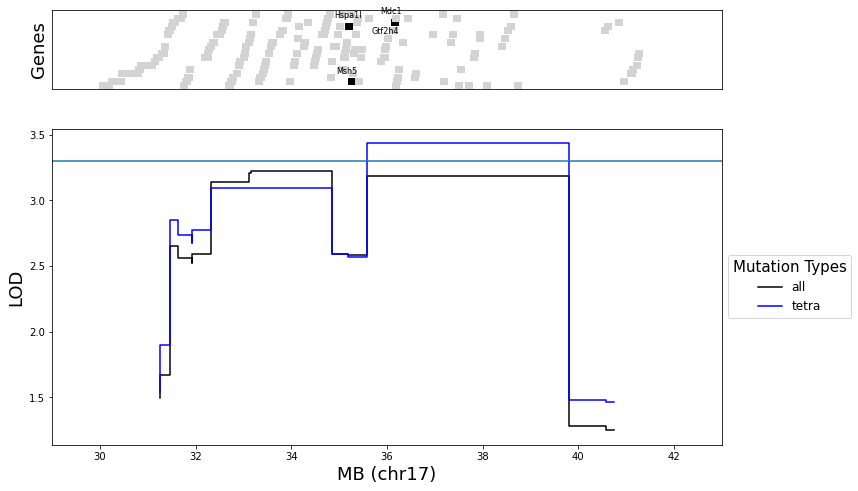

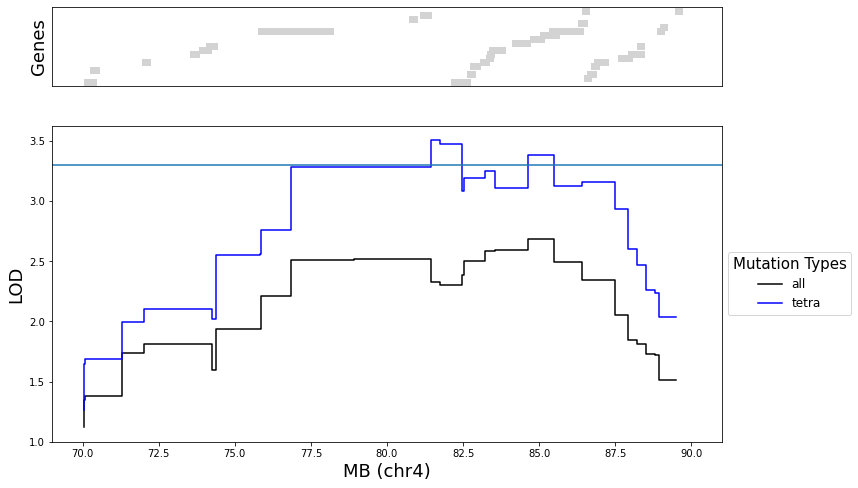

In [11]:
dna_repair_genes = [item.strip() for item in open('../outs/dna-repair-genes.txt', 'r').readlines()]
perc_expand = perc_expand_by_epoch[perc_expand_by_epoch["epoch_grp"]=="all"]
perc_expand_tetra = perc_expand_by_epoch_tetra[perc_expand_by_epoch_tetra["epoch_grp"]=="all"]

def GetYCoords(values, numtotal):
    ycoords = []
    while len(ycoords) <= numtotal:
        ycoords.extend(values)
    return ycoords[0:numtotal]

regions = [("chr17", 30, 42, []), ("chr4", 70, 90, [])]
W = 1
for r in regions:
    pe_region = perc_expand[(perc_expand["chr"]==r[0]) & 
                           (perc_expand["pos"]>r[1]*10**6) &
                           (perc_expand["pos"]<r[2]*10**6)]
    pe_region_tetra = perc_expand_tetra[(perc_expand_tetra["chr"]==r[0]) & 
                           (perc_expand_tetra["pos"]>r[1]*10**6) &
                           (perc_expand_tetra["pos"]<r[2]*10**6)]
    gtf_region = gtf_file[(gtf_file[0]==r[0]) &
        (gtf_file[2]=="gene") &
        (gtf_file[3]>r[1]*10**6) &
        (gtf_file[4]<r[2]*10**6)].copy()
    gtf_region[8] = gtf_region[8].apply(lambda x: x.split('gene_name "')[1].split('"')[0])
    gtf_region = gtf_region[~gtf_region[8].apply(lambda x: x.startswith("Gm") or x.endswith("Rik") or x.startswith("ENSM"))]
    if len(r[3])>0:
        gtf_region = gtf_region[gtf_region[8].isin(r[3])]
    print([item for item in list(gtf_region[8]) if item in dna_repair_genes])
    fig, ax = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 4]})
    
    #### Plot gene locations ####
    ax[0].set_xlim((r[1]-W, r[2]+W))
    ax[0].set_ylim([-10, 10])
    y_locations = GetYCoords(range(-9, 10), gtf_region.shape[0])
    count = 0

    for index, row in gtf_region.iterrows():
        x_points = [float(row[3]/10**6), float(row[4]/10**6)]
        if row[8] in dna_repair_genes:
            ax[0].plot(x_points, [y_locations[count]]*2, linewidth=7, label=row[8], color = 'black')
            ax[0].annotate(row[8], xy=(x_points[0]-0.3, y_locations[count]+2), fontsize=8)
        else:
            ax[0].plot(x_points, [y_locations[count]]*2, linewidth=7, label=row[8], color = 'lightgray')
        count += 1
    ax[0].tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax[0].set_ylabel('Genes', fontsize=18)

    #### Plot LOD epoch lines ###
    ax[1].set_xlim((r[1]-W, r[2]+W))
    x_all, y_all = get_pts(list(pe_region["pos"]/10**6),list(pe_region["LOD"]))
    x_tetra, y_tetra = get_pts(list(pe_region_tetra["pos"]/10**6),list(pe_region_tetra["LOD"]))

    ax[1].plot(x_all, y_all, label = 'all', color='black')
    ax[1].plot(x_tetra, y_tetra, label = 'tetra', color='blue')
    ax[1].axhline(y=3.3)
    ax[1].legend(title='Mutation Types', title_fontsize = 15, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('MB (%s)'%r[0], fontsize=18)
    plt.ylabel('LOD', fontsize=18)
    fig.savefig('../pdfs/SuppFig5_%s.pdf'%r[0])